In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

In [2]:
def f(x):
    return 2 -3*x**2 + 4*x**4

In [3]:
def f_kde(x, x_rnd, weights, sigma=0.1):
    x = x.T * np.ones([len(x_rnd), len(x)])
    x_rnd = x_rnd.reshape(len(x_rnd), 1)
    weights = weights.reshape(len(weights), 1)
    x_dist = (x - x_rnd)
    f_kde_contribution = weights * norm.pdf(x_dist, 0, sigma)
    f_kde = f_kde_contribution.sum(axis=0)
    var_f_kde = np.sqrt((f_kde_contribution**2).sum(axis=0))
    return f_kde, var_f_kde

In [4]:
rng = np.random.default_rng()

In [5]:
x_rnd = rng.uniform(0, 1, 10000)
f_rnd = f(x_rnd)/len(x_rnd)

Text(0.5, 1.0, 'Test with N random = 10000')

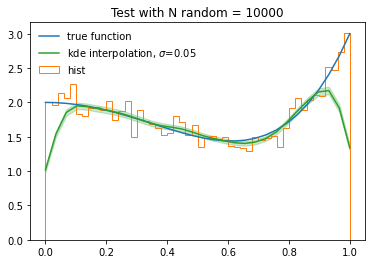

In [9]:
x_test = np.linspace(0., 1, 30)
plt.plot(x_test, f(x_test), label='true function')
bins = np.linspace(0, 1, 51)
plt.hist(x_rnd, bins=bins, weights=f_rnd/(bins[1] - bins[0]), label='hist', histtype='step')
# for sigma in [0.005, 0.05, 0.2]:
for sigma in [0.05]:
    f_est, var = f_kde(x_test, x_rnd, f_rnd, sigma)
    plt.plot(x_test, f_est, label=f'kde interpolation, $\sigma$={sigma}')
    plt.fill_between(x_test, f_est-var, f_est+var, alpha=0.25, color=plt.gca().lines[-1].get_color(), interpolate=True)
plt.legend(frameon=False)
plt.title('Test with N random = 10000')

In [11]:
# playing with a counting experiment
x_rnd, y_rnd = rng.uniform(0, 1, 100000), rng.uniform(0, f(1), 100000)

In [12]:
f_rnd = f(x_rnd)
x_good_rnd = x_rnd[y_rnd < f_rnd]
w_rnd = np.ones(len(x_good_rnd)) * len(x_good_rnd)/len(x_rnd) * f(1) / len(x_good_rnd)

Text(0.5, 1.0, 'Test with N random = 10000')

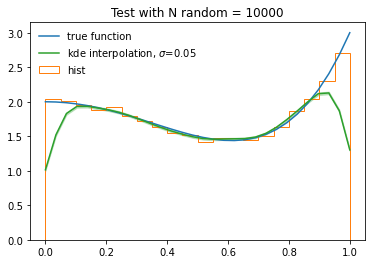

In [14]:
x_test = np.linspace(0, 1, 30)
plt.plot(x_test, f(x_test), label='true function')
bins = np.linspace(0, 1, 21)
plt.hist(x_good_rnd, bins=bins, weights=w_rnd/(bins[1] - bins[0]), label='hist', histtype='step')
# for sigma in [0.005, 0.05, 0.2]:
for sigma in [0.05]:
    f_est, var = f_kde(x_test, x_good_rnd, w_rnd, sigma)
    plt.plot(x_test, f_est, label=f'kde interpolation, $\sigma$={sigma}')
    plt.fill_between(x_test, f_est-var, f_est+var, alpha=0.25, color=plt.gca().lines[-1].get_color(), interpolate=True)
    # plt.plot(x_test, len(x_good_rnd)/len(x_rnd) * f(1)*sum_kde(x_test, x_good_rnd, sigma), label=f'kde interpolation, $\sigma$={sigma}')
plt.legend(frameon=False)
plt.title('Test with N random = 10000')

In [15]:
# add a selection variable

In [16]:
def y(x):
    return rng.normal(x**2 -1, 1)

In [17]:
y_rnd = y(x_good_rnd)
rnd_passed = y_rnd > 0

x_rnd_passed = x_good_rnd[rnd_passed]
y_rnd_passed = y_rnd[rnd_passed]
w_rnd_passed = w_rnd[rnd_passed]

(0.0, 1.0)

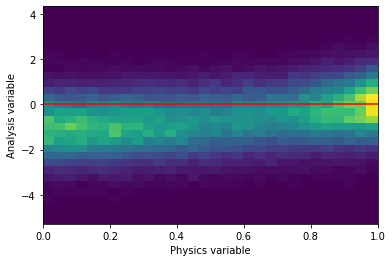

In [18]:
plt.hist2d(x_good_rnd, y_rnd, bins=(30, 30))
plt.xlabel('Physics variable')
plt.ylabel('Analysis variable')
plt.hlines(0, 0, 1, 'r')
plt.xlim(0, 1)

Text(0.5, 1.0, 'Test with N random = 100000')

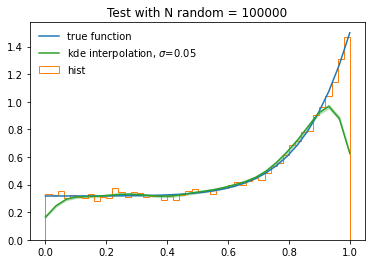

In [21]:
x_test = np.linspace(0, 1, 30)
plt.plot(x_test, f(x_test)*(1-norm.cdf(0, x_test**2-1, 1)), label='true function')

bins = np.linspace(0, 1, 51)
plt.hist(x_rnd_passed, bins=bins, weights=w_rnd_passed/(bins[1] - bins[0]), label='hist', histtype='step')

# for sigma in [0.005, 0.05, 0.2]:
for sigma in [0.05]:
    f_est, var = f_kde(x_test, x_rnd_passed, w_rnd_passed, sigma)
    plt.plot(x_test, f_est, label=f'kde interpolation, $\sigma$={sigma}')
    plt.fill_between(x_test, f_est-var, f_est+var, alpha=0.25, color=plt.gca().lines[-1].get_color(), interpolate=True)
    # plt.plot(x_test, len(x_good_rnd)/len(x_rnd) * f(1)*sum_kde(x_test, x_good_rnd, sigma), label=f'kde interpolation, $\sigma$={sigma}')
plt.legend(frameon=False)
plt.title('Test with N random = 100000')

# test with importance sampling

In [5]:
def f(var):
    x = var[0]
    mu = var[1]
    normalisation = mu**2+1
    mean = 3*mu -2
    sigma = (mu*(mu+1)+ 0.5)
    return normalisation*norm.pdf(x, mean, sigma)

In [6]:
dx, dmu = 0.05, 0.05

# generate 2 2d grids for the x & y bounds
mu, x = np.mgrid[slice(0, 1 + dmu, dmu),
                slice(-3, 3 + dx, dx)]

Text(0.5, 0, '$x$ - analysis')

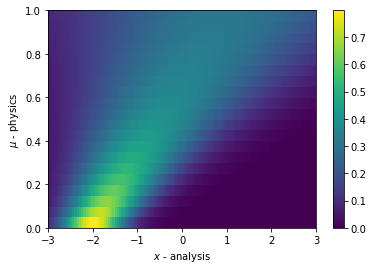

In [7]:
z = f([x, mu])
z = z[:-1, :-1]
plt.pcolormesh(x, mu, z)
plt.colorbar()
plt.ylabel(r'$\mu$ - physics')
plt.xlabel(r'$x$ - analysis')

In [8]:
import vegas

In [12]:
integ = vegas.Integrator([[-3, 3], [0, 1]])
result = integ(f, nitn=10, neval=100000)
print(result.summary())

itn   integral        wgt average     chi2/dof        Q
-------------------------------------------------------
  1   1.222986(66)    1.222986(66)        0.00     1.00
  2   1.223026(64)    1.223007(46)        0.18     0.67
  3   1.222888(63)    1.222965(37)        1.25     0.29
  4   1.222831(64)    1.222931(32)        1.94     0.12
  5   1.222941(65)    1.222933(29)        1.46     0.21
  6   1.222953(66)    1.222936(26)        1.18     0.31
  7   1.223000(65)    1.222945(25)        1.12     0.35
  8   1.223096(64)    1.222965(23)        1.66     0.11
  9   1.223028(64)    1.222972(22)        1.56     0.13
 10   1.222922(63)    1.222967(20)        1.45     0.16



In [20]:
x_s = []
weight_s = []
n_iterations = 10000
integral = 0
for x, wgt in integ.random_batch():
    x_s.append(x.T)
    weight_s.append(wgt * f(x.T))
    integral += wgt.dot(f(x.T))
    
x_s = np.concatenate(x_s, axis=1)
weight_s = np.concatenate(weight_s)/n_iterations

In [21]:
integral

1.2228713612451212

In [22]:
x_s.shape

(2, 62241)

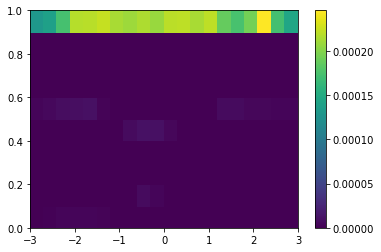

In [16]:
bins = (np.linspace(-3, 3, 21), np.linspace(0, 1, 11))
bin_size = (bins[0][1]-bins[0][0]) * (bins[1][1]-bins[1][0])
plt.hist2d(x_s[0], x_s[1], bins=bins, weights=weight_s/bin_size);
plt.colorbar()

In [25]:
import gvar

In [26]:
integral = 0.0
variance = 0.0
for x, wgt, hcube in integ.random_batch(yield_hcube=True):
    wgt_fx = wgt * f(x.T)
    # iterate over hypercubes: compute variance for each,
    #                          and accumulate for final result
    for i in range(hcube[0], hcube[-1] + 1):
        idx = (hcube == i)          # select array items for h-cube i
        nwf = np.sum(idx)           # number of points in h-cube i
        wf = wgt_fx[idx]
        sum_wf = np.sum(wf)         # sum of wgt * f(x) for h-cube i
        sum_wf2 = np.sum(wf ** 2)   # sum of (wgt * f(x)) ** 2
        integral += sum_wf
        variance += (sum_wf2 * nwf - sum_wf ** 2) / (nwf - 1.)
# answer = integral;   standard deviation = variance ** 0.5
result = gvar.gvar(integral, variance ** 0.5)

In [27]:
result

1.223031(65)

In [ ]:
bins = (np.linspace(-3, 3, 21), np.linspace(0, 1, 11))
bin_size = (bins[0][1]-bins[0][0]) * (bins[1][1]-bins[1][0])
plt.hist2d(x_s[0], x_s[1], bins=bins, weights=weight_s/bin_size);
plt.colorbar()

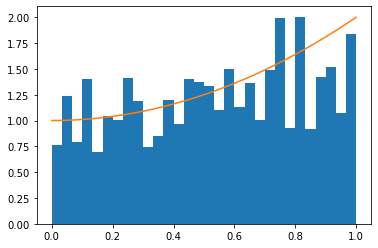

In [144]:
bins = np.linspace(0, 1, 31)
bin_size = (bins[1]-bins[0])
plt.hist(x_s[1], bins=bins, weights=weight_s/bin_size);
plt.plot(bins, bins**2+1)

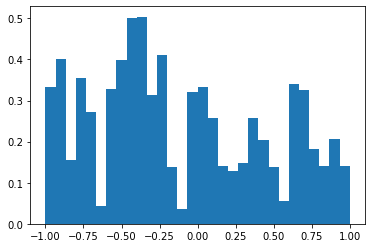

In [146]:
bins = np.linspace(-1, 1, 31)
bin_size = (bins[1]-bins[0])
plt.hist(x_s[0], bins=bins, weights=weight_s/bin_size);